In [9]:
!wget https://raw.githubusercontent.com/satssehgal/MLAPLI/master/bankloan.csv

--2023-08-21 02:34:32--  https://raw.githubusercontent.com/satssehgal/MLAPLI/master/bankloan.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37960 (37K) [text/plain]
Saving to: ‘bankloan.csv’

bankloan.csv        100%[===================>]  37.07K  --.-KB/s    in 0.004s  

2023-08-21 02:34:32 (9.17 MB/s) - ‘bankloan.csv’ saved [37960/37960]



In [22]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from keras import Sequential
from keras.layers import Dense

In [17]:
df = pd.read_csv('bankloan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
df.dropna(inplace=True)
df.drop('Loan_ID',axis=1, inplace=True)
df['LoanAmount'] = (df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])

Counter({'N': 148, 'Y': 332})

In [20]:
df.isna().any()

Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [21]:
pre_y = df['Loan_Status']
pre_X = df.drop('Loan_Status',axis=1)
dm_X = pd.get_dummies(pre_X)
dm_y = pre_y.map(dict(Y=1, N=0))
dm_X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128000,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141000,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
5,2.0,5417,4196.0,267000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71000,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0
610,3.0,4106,0.0,40000,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0
611,1.0,8072,240.0,253000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
612,2.0,7583,0.0,187000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1


In [27]:
smote = SMOTE(sampling_strategy='minority')
X1, y = smote.fit_resample(dm_X, dm_y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)

In [28]:
Counter(y)

Counter({0: 332, 1: 332})

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
classifier = Sequential([
    Dense(400, activation='relu', kernel_initializer='random_normal',input_dim=X_test.shape[1]),
    Dense(800, activation='relu', kernel_initializer='random_normal'),
    Dense(10, activation='relu', kernel_initializer='random_normal'),
    Dense(1, activation='sigmoid', kernel_initializer='random_normal')
])

classifier.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics='accuracy')

classifier.fit(X_train, y_train, batch_size=32, epochs=50, verbose=0)
eval_model = classifier.evaluate(X_train,y_train)
eval_model

17/17 [==============================] - 0s 3ms/step - loss: 0.2215 - accuracy: 0.9209


[0.2214786261320114, 0.9209039807319641]

In [54]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

5/5 [==============================] - 0s 4ms/step


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

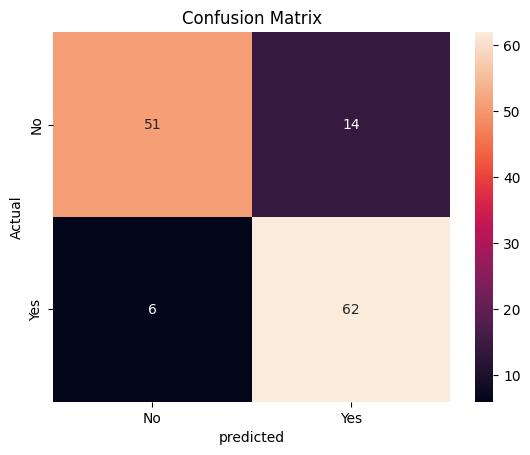

In [55]:
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)

ax.set_xlabel('predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No','Yes'])
ax.yaxis.set_ticklabels(['No','Yes'])

In [57]:
import pickle
import joblib
joblib.dump(classifier, 'loan_model.pkl')

['loan_model.pkl']